# Data Analysis Notebook

This notebook is for data analysis and visualization.

In [ ]:
# Import common libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import lasio
import laspy



In [ ]:
las = laspy.read("../data/2743_1234.las")
print(f"Number of points: {len(las.points)}")
print(f"Available fields: {las.point_format.dimension_names}")


Number of points: 20985999
Available fields: <generator object PointFormat.dimension_names.<locals>.<genexpr> at 0x000002380C7513C0>


In [ ]:
points = las.points
x = points['X']
y = points['Y']
z = points['Z']

print(f"Number of points: {len(points)}")

Number of points: 20985999


In [ ]:
# Get point format
point_format = las.point_format
print(list(point_format.dimension_names))

print(point_format[3].name)
print(point_format[3].num_bits)
print(point_format[3].kind)

['X', 'Y', 'Z', 'intensity', 'return_number', 'number_of_returns', 'scan_direction_flag', 'edge_of_flight_line', 'classification', 'synthetic', 'key_point', 'withheld', 'scan_angle_rank', 'user_data', 'point_source_id', 'gps_time']
intensity
16
DimensionKind.UnsignedInteger


In [ ]:
print(f"File Source ID: {las.header.file_source_id}")
print(f"Global Encoding: {las.header.global_encoding}")

print(f"Version: {las.header.version}")
print(f"System Identifier: {las.header.system_identifier}")
print(f"Generating Software: {las.header.generating_software}")
print(f"Creation Date: {las.header.creation_date}")
print(f"\nPoint Records Range Information:")
print(f"X range: {las.header.mins[0]:.2f} to {las.header.maxs[0]:.2f}")
print(f"Y range: {las.header.mins[1]:.2f} to {las.header.maxs[1]:.2f}")
print(f"Z range: {las.header.mins[2]:.2f} to {las.header.maxs[2]:.2f}")

File Source ID: 0
Global Encoding: <laspy.header.GlobalEncoding object at 0x000002380C61BD90>
Version: 1.2
System Identifier: LAStools (c) by rapidlasso GmbH
Generating Software: las2las (version 180919)
Creation Date: 2019-04-10

Point Records Range Information:
X range: 2743000.00 to 2743999.99
Y range: 1234000.00 to 1234999.99
Z range: 1798.80 to 2459.03


In [ ]:
# Create a dictionary with LAS info
las_info = {
    'num_points': len(las.points),
    'fields': ['X',
               'Y',
               'Z',
               'intensity',
               'return_number',
               'number_of_returns',
               'scan_direction_flag',
               'edge_of_flight_line',
               'classification',
               'synthetic',
               'key_point',
               'withheld',
               'scan_angle_rank',
               'user_data',
               'point_source_id',
               'gps_time'],
    'header': {
        'version': las.header.version,
        'system_identifier': las.header.system_identifier,
        'creation_date': las.header.creation_date
    }
}
las_info

{'num_points': 20985999,
 'fields': ['X',
  'Y',
  'Z',
  'intensity',
  'return_number',
  'number_of_returns',
  'scan_direction_flag',
  'edge_of_flight_line',
  'classification',
  'synthetic',
  'key_point',
  'withheld',
  'scan_angle_rank',
  'user_data',
  'point_source_id',
  'gps_time'],
 'header': {'version': Version(major=1, minor=2),
  'system_identifier': 'LAStools (c) by rapidlasso GmbH',
  'creation_date': datetime.date(2019, 4, 10)}}

In [ ]:
# Create DataFrame from points data
# Create DataFrame from points data
well = pd.DataFrame({
    'X': x,
    'Y': y,
    'Z': z,
    'intensity': las.intensity,
    'return_number': las.return_number,
    'number_of_returns': las.number_of_returns,
    'scan_direction_flag': las.scan_direction_flag,
    'edge_of_flight_line': las.edge_of_flight_line,
    'classification': las.classification,
    'synthetic': las.synthetic,
    'key_point': las.key_point,
    'withheld': las.withheld,
    'scan_angle_rank': las.scan_angle_rank,
    'user_data': las.user_data,
    'point_source_id': las.point_source_id
})
well.head(20)  # Display the first 5 rows of the dataframe

,X,Y,Z,intensity,return_number,number_of_returns,scan_direction_flag,edge_of_flight_line,classification,synthetic,key_point,withheld,scan_angle_rank,user_data,point_source_id
0,0,84087,202298,456,"[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...","[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",-17,56,1446
1,0,83669,202758,387,"[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...","[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",-18,62,1446
2,0,83645,202765,448,"[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...","[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",-17,60,1446
3,0,83354,203006,415,"[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...","[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",-17,54,1446
4,0,83120,203095,268,"[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...","[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",-18,76,1446
5,0,81267,205348,292,"[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...","[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",-18,74,1446
6,0,81001,205751,495,"[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...","[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",-18,54,1446
7,0,77025,207815,398,"[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...","[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",-20,79,1446
8,0,73479,205973,387,"[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...","[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[2,

In [39]:
well.describe()  # Display summary statistics of the dataframe

,X,Y,Z,intensity,scan_angle_rank,user_data,point_source_id
count,2.098600e+07,2.098600e+07,2.098600e+07,2.098600e+07,2.098600e+07,2.098600e+07,2.098600e+07
mean,5.131762e+04,4.922639e+04,2.051432e+05,7.441024e+02,-4.052820e-01,5.470626e+01,1.452964e+03
std,2.889542e+04,2.948362e+04,1.142543e+04,4.578274e+03,1.722888e+01,6.194551e+00,9.391578e+01
min,0.000000e+00,0.000000e+00,1.798800e+05,1.000000e+00,-3.000000e+01,0.000000e+00,1.441000e+03
25%,2.654000e+04,2.300900e+04,1.970890e+05,3.110000e+02,-1.600000e+01,5.300000e+01,1.443000e+03
50%,5.253100e+04,4.876800e+04,2.047630e+05,3.980000e+02,0.000000e+00,5.400000e+01,1.444000e+03
75%,7.643600e+04,7.557200e+04,2.120970e+05,5.020000e+02,1.400000e+01,5.600000e+01,1.444000e+03
max,9.999900e+04,9.999900e+04,2.459030e+05,6.553500e+04,3.000000e+01,2.550000e+02,2.391000e+03


In [34]:
well.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20985999 entries, 0 to 20985998
Data columns (total 9 columns):
 #   Column          Dtype 
---  ------          ----- 
 0   X               int32 
 1   Y               int32 
 2   Z               int32 
 3   intensity       uint16
 4   return_number   object
 5   classification  object
 6   synthetic       object
 7   key_point       object
 8   withheld        object
dtypes: int32(3), object(5), uint16(1)
memory usage: 1.1+ GB


Quick Plot
Using the ploting function within pandas, we can plot all curves on a single plot.

In [40]:
import numpy as np

def clean_data(df, remove_outliers=True, outlier_threshold=1.5, fill_missing=True):
    
    df_clean = df.copy()
    
    # Optional: Remove outliers in numeric columns using IQR method
    if remove_outliers:
        numeric_cols = df_clean.select_dtypes(include=[np.number]).columns
        for col in numeric_cols:
            Q1 = df_clean[col].quantile(0.25)
            Q3 = df_clean[col].quantile(0.75)
            IQR = Q3 - Q1
            lower_bound = Q1 - outlier_threshold * IQR
            upper_bound = Q3 + outlier_threshold * IQR
            # Keep only rows within the bounds
            df_clean = df_clean[(df_clean[col] >= lower_bound) & (df_clean[col] <= upper_bound)]
            
    # Optional: Fill missing values
    if fill_missing:
        for col in df_clean.columns:
            if df_clean[col].isnull().any():
                if df_clean[col].dtype in [np.float64, np.float32, np.int64, np.int32]:
                    fill_val = df_clean[col].median()
                else:
                    mode_val = df_clean[col].mode()
                    fill_val = mode_val[0] if not mode_val.empty else 'Unknown'
                df_clean[col] = df_clean[col].fillna(fill_val)
    
    return df_clean

<Axes: >

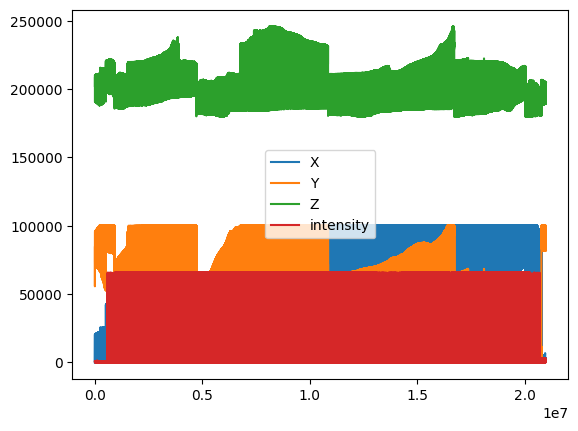

In [ ]:
well.plot()

In [ ]:
# %pip install open3d
# Import common libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import lasio

import laspy
import open3d as o3d

# Read LAS file in chunks
chunk_size = 1000000  # Define chunk size
las = laspy.read("../data/2743_1234.las")

# Initialize an empty point cloud
pcd = o3d.geometry.PointCloud()

# Process data in chunks
for i in range(0, len(las.points), chunk_size):
	chunk = las.points[i:i + chunk_size]
	x = chunk['X']
	y = chunk['Y']
	z = chunk['Z']
	points = np.vstack((x, y, z)).T
	pcd.points.extend(o3d.utility.Vector3dVector(points))

	# Visualize the point cloud for the current chunk
	o3d.visualization.draw_geometries([pcd])
	pcd.clear()  # Clear the point cloud for the next chunk


[Open3D WARNING] [ViewControl] SetViewPoint() failed because window height and width are not set.


KeyboardInterrupt: 

In [ ]:
#%pip install geemap[lidar] open3d

In [ ]:
import os
import geemap

In [6]:
filename = "../data/2743_1234.las"

In [7]:
las = geemap.read_lidar(filename)

In [8]:
las.header

<LasHeader(1.2, <PointFormat(1, 0 bytes of extra dims)>)>

In [9]:
las.header.point_count

20985999

In [10]:
list(las.point_format.dimension_names)

['X',
 'Y',
 'Z',
 'intensity',
 'return_number',
 'number_of_returns',
 'scan_direction_flag',
 'edge_of_flight_line',
 'classification',
 'synthetic',
 'key_point',
 'withheld',
 'scan_angle_rank',
 'user_data',
 'point_source_id',
 'gps_time']

In [11]:
las.X

array([   0,    0,    0, ..., 2555, 2555, 2554],
      shape=(20985999,), dtype=int32)

In [12]:
las.Y

array([84087, 83669, 83645, ..., 81917, 81910, 81906],
      shape=(20985999,), dtype=int32)

In [13]:
las.Z

array([202298, 202758, 202765, ..., 204831, 204852, 204878],
      shape=(20985999,), dtype=int32)

In [14]:
las.intensity

array([ 456,  387,  448, ..., 1615, 1412, 1689],
      shape=(20985999,), dtype=uint16)

In [19]:
geemap.view_lidar(filename, backend='open3d')

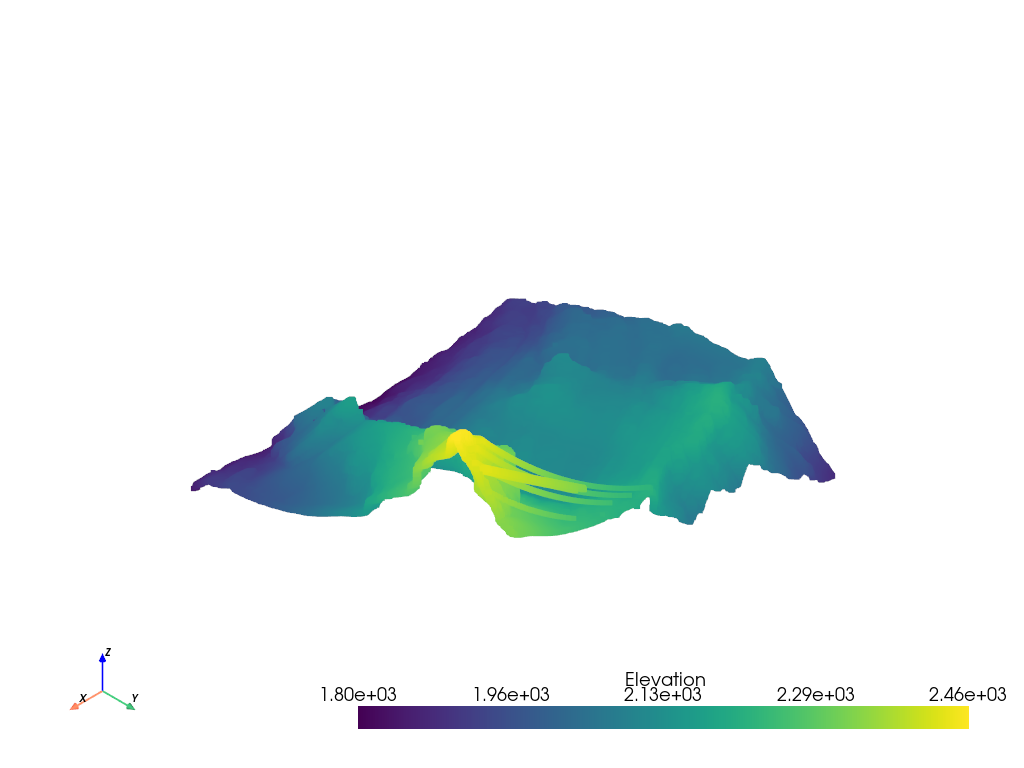

In [16]:
geemap.view_lidar(filename, backend='ipygany', background='white')

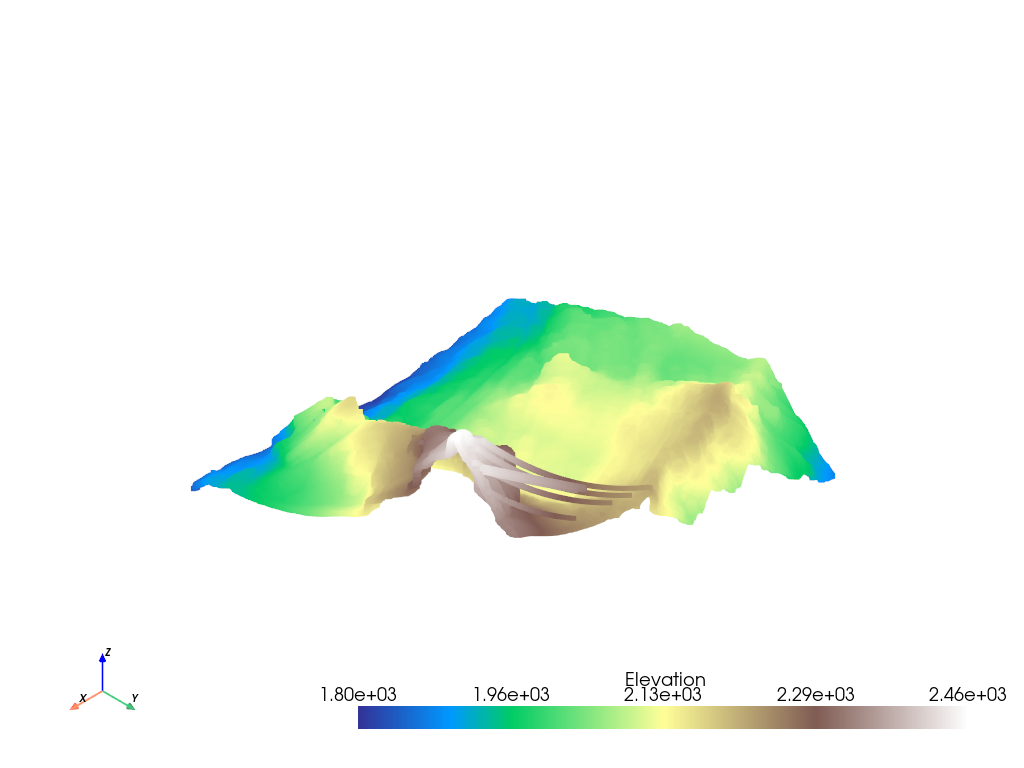

In [17]:
geemap.view_lidar(filename, cmap='terrain', backend='panel', background='white')

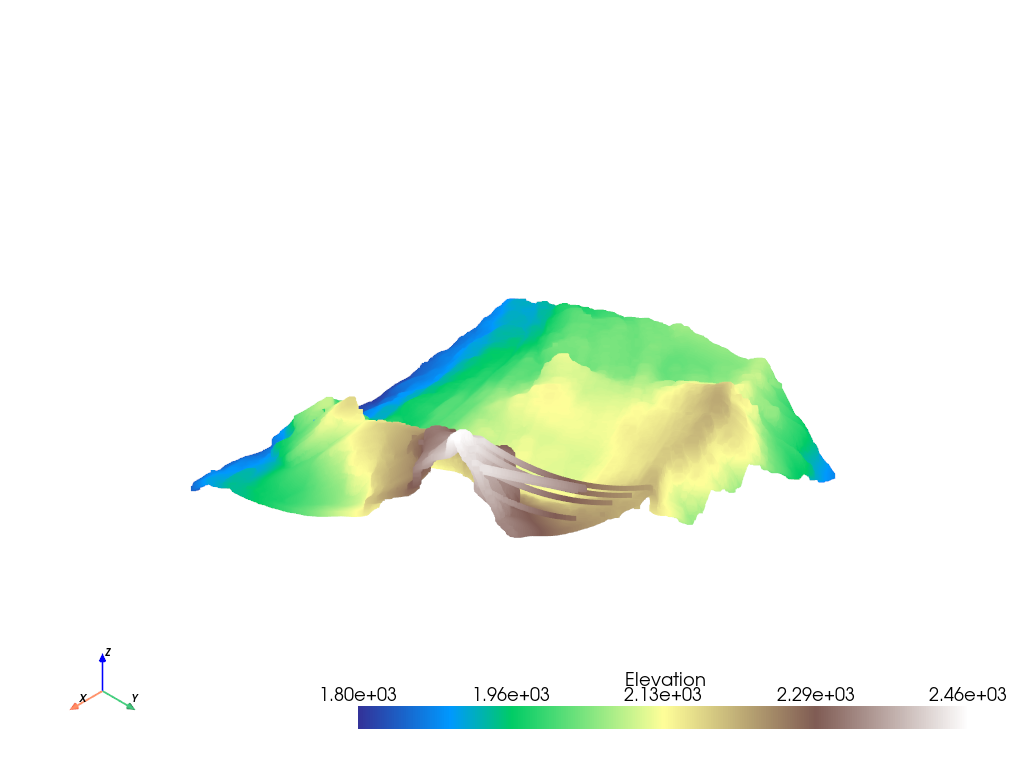

In [18]:
geemap.view_lidar(filename, cmap='terrain', backend='pyvista')

In [1]:
# data_analysis.ipynb - Jupyter Notebook for Exploratory Data Analysis
import laspy
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
import geemap

In [2]:
filename = "../data/2743_1234.las"

In [5]:
las = geemap.read_lidar(filename)

In [6]:
las.header
las.header.point_count


20985999

In [7]:
print("LAS Header Information:")
print(las.header)

LAS Header Information:
<LasHeader(1.2, <PointFormat(1, 0 bytes of extra dims)>)>


In [8]:
# Create DataFrame
df = pd.DataFrame({
    'X': las.x,
    'Y': las.y,
    'Z': las.z,
    'intensity': las.intensity,
    'return_number': las.return_number,
    'number_of_returns': las.number_of_returns,
    'scan_direction_flag': las.scan_direction_flag,
    'edge_of_flight_line': las.edge_of_flight_line,
    'classification': las.classification,
    'synthetic': las.synthetic,
    'key_point': las.key_point,
    'withheld': las.withheld,
    'scan_angle_rank': las.scan_angle_rank,
    'user_data': las.user_data,
    'point_source_id': las.point_source_id,
    'gps_time': las.gps_time
})
df.head()


,X,Y,Z,intensity,return_number,number_of_returns,scan_direction_flag,edge_of_flight_line,classification,synthetic,key_point,withheld,scan_angle_rank,user_data,point_source_id,gps_time
0,"[2743000.0, 2743000.0, 2743000.0, 2743000.0, 2...","[1234840.87, 1234836.69, 1234836.45, 1234833.5...","[2022.98, 2027.5800000000002, 2027.65, 2030.06...",456,"[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...","[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",-17,56,1446,1.923503e+08
1,"[2743000.0, 2743000.0, 2743000.0, 2743000.0, 2...","[1234840.87, 1234836.69, 1234836.45, 1234833.5...","[2022.98, 2027.5800000000002, 2027.65, 2030.06...",387,"[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...","[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",-18,62,1446,1.923503e+08
2,"[2743000.0, 2743000.0, 2743000.0, 2743000.0, 2...","[1234840.87, 1234836.69, 1234836.45, 1234833.5...","[2022.98, 2027.5800000000002, 2027.65, 2030.06...",448,"[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...","[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",-17,60,1446,1.923503e+08
3,"[2743000.0, 2743000.0, 2743000.0, 2743000.0, 2...","[1234840.87, 1234836.69, 1234836.45, 1234833.5...","[2022.98, 2027.5800000000002, 2027.65, 2030.06...",415,"[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...","[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",-17,54,1446,1.923503e+08
4,"[2743000.0, 2743000.0, 2743000.0, 2743000.0, 2...","[1234840.87, 1234836.69, 1234836.45, 1234833.5...","[2022.98, 2027.5800000000002, 2027.65, 2030.06...",268,"[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...","[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",-18,76,1446,1.923503e+08


In [34]:
import pandas as pd

# Function to safely extract numeric values from potential lists/arrays in dataframe columns
def extract_numeric_ranges(df, column):
    """
    Extract min and max values from a dataframe column that may contain lists or arrays.
    Attempts to cast values to float.
    """
    # If the column's dtype is object, we attempt to extract numbers from its entries
    if df[column].dtype == 'object':
        try:
            first_val = df[column].iloc[0]
            sample_size = min(10000, len(df))
            sample = df[column].sample(sample_size)
            extracted = []
            # If first element is iterable (but not a string), assume each value is a list-like object
            if hasattr(first_val, '__iter__') and not isinstance(first_val, str):
                for x in sample:
                    try:
                        # Try to cast the first element of the list to float
                        value = float(x[0])
                        extracted.append(value)
                    except Exception:
                        continue
            else:
                # Otherwise, try to cast the value itself to float
                for x in sample:
                    try:
                        value = float(x)
                        extracted.append(value)
                    except Exception:
                        continue
            if len(extracted) == 0:
                return "Unknown", "Unknown"
            return min(extracted), max(extracted)
        except (IndexError, TypeError):
            return "Unknown", "Unknown"
    else:
        # For numeric columns, try a straightforward conversion
        try:
            return float(df[column].min()), float(df[column].max())
        except Exception:
            return "Unknown", "Unknown"

# Get ranges for coordinate columns
x_min, x_max = extract_numeric_ranges(df, 'X')
y_min, y_max = extract_numeric_ranges(df, 'Y')
z_min, z_max = extract_numeric_ranges(df, 'Z')

# Use formatted printing if the values are numeric; otherwise, print as is
if isinstance(x_min, (int, float)):
    print(f"X range: {x_min:.2f} to {x_max:.2f}")
else:
    print(f"X range: {x_min} to {x_max}")
if isinstance(y_min, (int, float)):
    print(f"Y range: {y_min:.2f} to {y_max:.2f}")
else:
    print(f"Y range: {y_min} to {y_max}")
if isinstance(z_min, (int, float)):
    print(f"Z range: {z_min:.2f} to {z_max:.2f}")
else:
    print(f"Z range: {z_min} to {z_max}")

# Extract ranges for other important columns (assumed to be numeric)
intensity_min, intensity_max = df['intensity'].min(), df['intensity'].max()
print(f"Intensity range: {intensity_min} to {intensity_max}")

# Get count of points
print(f"Total points: {len(df):,}")

# If classification is important, show its distribution (sampled)
if 'classification' in df.columns:
    try:
        # If classification is a list, sample and extract the first element
        if df['classification'].dtype == 'object':
            sample = df['classification'].head(1000)
            if isinstance(sample.iloc[0], (list, tuple)):
                class_values = [val[0] if isinstance(val, (list, tuple)) else val for val in sample]
                class_counts = pd.Series(class_values).value_counts()
                print("\nPoint classification distribution (sample):")
                for cls, count in class_counts.items():
                    print(f"Class {cls}: {count} points")
            else:
                class_counts = df['classification'].head(1000).value_counts()
                print("\nPoint classification distribution (sample):")
                for cls, count in class_counts.items():
                    print(f"Class {cls}: {count} points")
    except Exception:
        pass

print(df.head())


X range: Unknown to Unknown
Y range: Unknown to Unknown
Z range: Unknown to Unknown
Intensity range: 1 to 65535
Total points: 20,985,999

Point classification distribution (sample):
Class <SubFieldView([2 2 2 ... 2 2 2])>: 1000 points
                                                   X  \
0  [2743000.0, 2743000.0, 2743000.0, 2743000.0, 2...   
1  [2743000.0, 2743000.0, 2743000.0, 2743000.0, 2...   
2  [2743000.0, 2743000.0, 2743000.0, 2743000.0, 2...   
3  [2743000.0, 2743000.0, 2743000.0, 2743000.0, 2...   
4  [2743000.0, 2743000.0, 2743000.0, 2743000.0, 2...   

                                                   Y  \
0  [1234840.87, 1234836.69, 1234836.45, 1234833.5...   
1  [1234840.87, 1234836.69, 1234836.45, 1234833.5...   
2  [1234840.87, 1234836.69, 1234836.45, 1234833.5...   
3  [1234840.87, 1234836.69, 1234836.45, 1234833.5...   
4  [1234840.87, 1234836.69, 1234836.45, 1234833.5...   

                                                   Z  intensity  \
0  [2022.98, 2027.580000

C:\Users\Rokas\AppData\Local\Temp\ipykernel_29636\3815350107.py:68: UserWarning: Attempting to set identical low and high xlims makes transformation singular; automatically expanding.
  ax1.set_xlim(mid_x - max_range/2, mid_x + max_range/2)
C:\Users\Rokas\AppData\Local\Temp\ipykernel_29636\3815350107.py:69: UserWarning: Attempting to set identical low and high ylims makes transformation singular; automatically expanding.
  ax1.set_ylim(mid_y - max_range/2, mid_y + max_range/2)
C:\Users\Rokas\AppData\Local\Temp\ipykernel_29636\3815350107.py:70: UserWarning: Attempting to set identical low and high zlims makes transformation singular; automatically expanding.
  ax1.set_zlim(mid_z - max_range/2, mid_z + max_range/2)


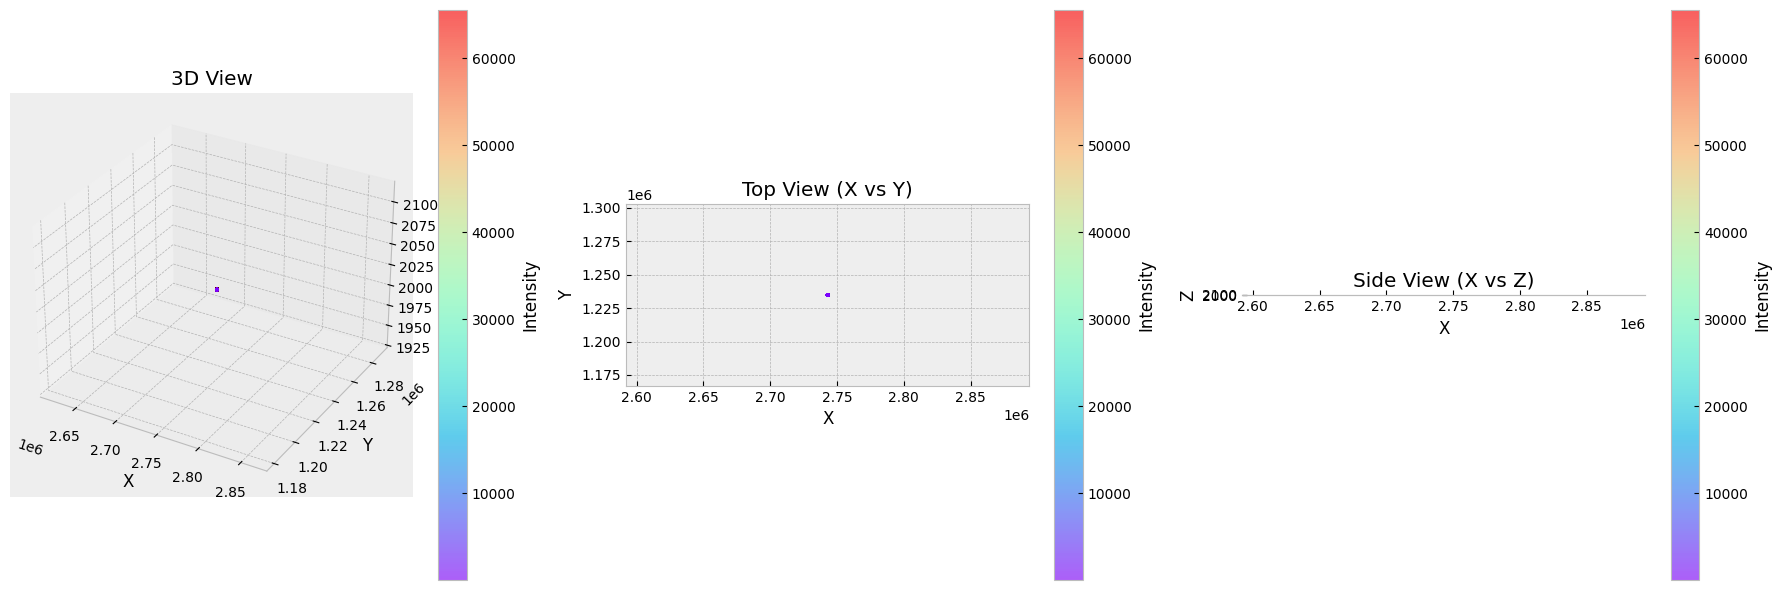

In [10]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from mpl_toolkits.mplot3d import Axes3D

# ---------------------------
# 1. Sample the Data (if needed)
# ---------------------------
sample_size = 100_0000
if len(df) > sample_size:
    df_sample = df.sample(sample_size, random_state=42).copy()
else:
    df_sample = df.copy()

# ---------------------------
# 2. Convert X, Y, and Z to floats
# ---------------------------
def convert_first(x):
    """
    If x is list-like (including ScaledArrayView), return the first element as float.
    Otherwise, cast x to float.
    """
    try:
        # Check if x is iterable but not a string/bytes
        if hasattr(x, '__getitem__') and not isinstance(x, (str, bytes)):
            return float(x[0])
        else:
            return float(x)
    except Exception as e:
        return None

df_sample['X'] = df_sample['X'].apply(convert_first)
df_sample['Y'] = df_sample['Y'].apply(convert_first)
df_sample['Z'] = df_sample['Z'].apply(convert_first)

# Remove rows that failed conversion
df_sample = df_sample.dropna(subset=['X', 'Y', 'Z'])

# ---------------------------
# 3. Plot the Data
# ---------------------------
plt.style.use('bmh')
fig = plt.figure(figsize=(18, 6))

# 3D subplot
ax1 = fig.add_subplot(131, projection='3d')
sc1 = ax1.scatter(
    df_sample['X'], df_sample['Y'], df_sample['Z'],
    c=df_sample['intensity'], cmap='rainbow', alpha=0.6, s=5
)
ax1.set_title('3D View')
ax1.set_xlabel('X')
ax1.set_ylabel('Y')
ax1.set_zlabel('Z')
fig.colorbar(sc1, ax=ax1, label='Intensity')

# Force equal aspect in 3D
max_range = np.array([
    df_sample['X'].max() - df_sample['X'].min(),
    df_sample['Y'].max() - df_sample['Y'].min(),
    df_sample['Z'].max() - df_sample['Z'].min()
]).max()

mid_x = (df_sample['X'].max() + df_sample['X'].min()) / 2
mid_y = (df_sample['Y'].max() + df_sample['Y'].min()) / 2
mid_z = (df_sample['Z'].max() + df_sample['Z'].min()) / 2

ax1.set_xlim(mid_x - max_range/2, mid_x + max_range/2)
ax1.set_ylim(mid_y - max_range/2, mid_y + max_range/2)
ax1.set_zlim(mid_z - max_range/2, mid_z + max_range/2)

# 2D Top View
ax2 = fig.add_subplot(132)
sc2 = ax2.scatter(
    df_sample['X'], df_sample['Y'],
    c=df_sample['intensity'], cmap='rainbow', alpha=0.6, s=5
)
ax2.set_title('Top View (X vs Y)')
ax2.set_xlabel('X')
ax2.set_ylabel('Y')
ax2.set_aspect('equal', 'box')  # <-- Force equal aspect here too
fig.colorbar(sc2, ax=ax2, label='Intensity')

# 2D Side View
ax3 = fig.add_subplot(133)
sc3 = ax3.scatter(
    df_sample['X'], df_sample['Z'],
    c=df_sample['intensity'], cmap='rainbow', alpha=0.6, s=5
)
ax3.set_title('Side View (X vs Z)')
ax3.set_xlabel('X')
ax3.set_ylabel('Z')
ax3.set_aspect('equal', 'box')  # <-- Force equal aspect
fig.colorbar(sc3, ax=ax3, label='Intensity')

plt.tight_layout()
plt.show()


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20985999 entries, 0 to 20985998
Data columns (total 16 columns):
 #   Column               Dtype  
---  ------               -----  
 0   X                    object 
 1   Y                    object 
 2   Z                    object 
 3   intensity            uint16 
 4   return_number        object 
 5   number_of_returns    object 
 6   scan_direction_flag  object 
 7   edge_of_flight_line  object 
 8   classification       object 
 9   synthetic            object 
 10  key_point            object 
 11  withheld             object 
 12  scan_angle_rank      int8   
 13  user_data            uint8  
 14  point_source_id      uint16 
 15  gps_time             float64
dtypes: float64(1), int8(1), object(11), uint16(2), uint8(1)
memory usage: 2.0+ GB


In [8]:
# Basic statistics
df.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
X,20985999,1,"[2743000.0, 2743000.0, 2743000.0, 2743000.0, 2...",20985999,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Y,20985999,1,"[1234840.87, 1234836.69, 1234836.45, 1234833.5...",20985999,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Z,20985999,1,"[2022.98, 2027.5800000000002, 2027.65, 2030.06...",20985999,NaN,NaN,NaN,NaN,NaN,NaN,NaN
intensity,20985999.0,NaN,NaN,NaN,744.10242,4578.27449,1.0,311.0,398.0,502.0,65535.0
return_number,20985999,1,"[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...",20985999,NaN,NaN,NaN,NaN,NaN,NaN,NaN
number_of_returns,20985999,1,"[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...",20985999,NaN,NaN,NaN,NaN,NaN,NaN,NaN
scan_direction_flag,20985999,1,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",20985999,NaN,NaN,NaN,NaN,NaN,NaN,NaN
edge_of_flight_line,20985999,1,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",20985999,NaN,NaN,NaN,NaN,NaN,NaN,NaN
classification,20985999,1,"[2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, ...",20985999,NaN,NaN,NaN,NaN,NaN,NaN,NaN
synthetic,20985999,1,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",20985999,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from mpl_toolkits.mplot3d import Axes3D

# Sample a smaller subset of the data for visualization
sample_size = 10000  # Adjust this number based on your system's performance
df_viz = df.sample(sample_size, random_state=42)

# Function to convert list-like objects to single values
def convert_first(x):
    try:
        if hasattr(x, '__getitem__') and not isinstance(x, (str, bytes)):
            return float(x[0])
        else:
            return float(x)
    except Exception:
        return None

# Create a copy of the dataframe and convert coordinates to floats
df_viz = df_viz.copy()
df_viz['X'] = df_viz['X'].apply(convert_first)
df_viz['Y'] = df_viz['Y'].apply(convert_first)
df_viz['Z'] = df_viz['Z'].apply(convert_first)

# Create the figure and subplots using subplot2grid in a 3x3 layout.
fig = plt.figure(figsize=(12, 12))

# Left column: 3D scatter (spanning all 3 rows)
ax1 = plt.subplot2grid((3, 3), (0, 0), rowspan=3, colspan=1, projection='3d')
# Middle column: 2D scatter (X vs Y), spanning all 3 rows
ax2 = plt.subplot2grid((3, 3), (0, 1), rowspan=3, colspan=1)
# Top-right: 2D scatter (X vs Z)
ax3 = plt.subplot2grid((3, 3), (0, 2))
# Middle-right: Histogram of intensity
ax4 = plt.subplot2grid((3, 3), (1, 2))
# Bottom-right: Histogram of gps_time
ax5 = plt.subplot2grid((3, 3), (2, 2))

# --- ax1: 3D Scatter (X, Y, Z) colored by intensity ---
sc1 = ax1.scatter(df_viz['X'], df_viz['Y'], df_viz['Z'], c=df_viz['intensity'], cmap='viridis', s=5, alpha=0.6)
ax1.set_title("3D Scatter: X, Y, Z")
ax1.set_xlabel("X")
ax1.set_ylabel("Y")
ax1.set_zlabel("Z")
fig.colorbar(sc1, ax=ax1, label='Intensity')

# --- ax2: 2D Scatter (X vs Y) colored by intensity ---
sc2 = ax2.scatter(df_viz['X'], df_viz['Y'], c=df_viz['intensity'], cmap='viridis', s=5, alpha=0.6)
ax2.set_title("2D Scatter: X vs Y")
ax2.set_xlabel("X")
ax2.set_ylabel("Y")
fig.colorbar(sc2, ax=ax2, label='Intensity')

# --- ax3: 2D Scatter (X vs Z) colored by intensity ---
sc3 = ax3.scatter(df_viz['X'], df_viz['Z'], c=df_viz['intensity'], cmap='viridis', s=5, alpha=0.6)
ax3.set_title("2D Scatter: X vs Z")
ax3.set_xlabel("X")
ax3.set_ylabel("Z")
fig.colorbar(sc3, ax=ax3, label='Intensity')

# --- ax4: Histogram of intensity ---
ax4.hist(df_viz['intensity'], bins=30, edgecolor='black', color='skyblue')
ax4.set_title("Histogram: Intensity")
ax4.set_xlabel("Intensity")

# --- ax5: Histogram of gps_time ---
ax5.hist(df_viz['gps_time'], bins=30, edgecolor='black', color='salmon')
ax5.set_title("Histogram: GPS Time")
ax5.set_xlabel("GPS Time")
ax5.hist(df['gps_time'], bins=30, edgecolor='black', color='salmon')
ax5.set_title("Histogram: GPS Time")
ax5.set_xlabel("GPS Time")

plt.tight_layout()
plt.show()


NameError: name 'df' is not defined

ValueError: 'c' argument must be a color, a sequence of colors, or a sequence of numbers, not 13538281    [2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, ...
8153072     [2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, ...
10842161    [2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, ...
19258125    [2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, ...
15779209    [2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, ...
                                  ...                        
2656318     [2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, ...
12239101    [2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, ...
14549466    [2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, ...
17173389    [2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, ...
18623896    [2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, ...
Name: classification, Length: 100000, dtype: object

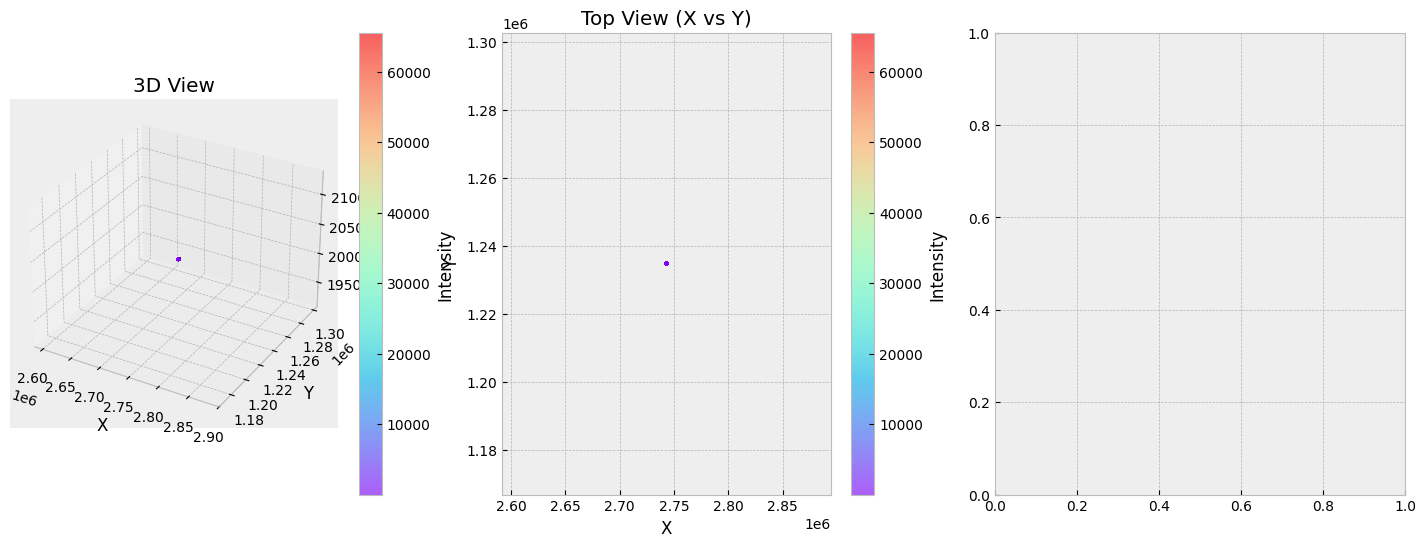

In [ ]:
# First, fix the df_exploded dataframe by properly extracting values from las object
if 'df_exploded' not in globals():
    # Get direct access to the coordinate arrays from las
    df_exploded = pd.DataFrame({
        'X': las.x,  # Direct access to x coordinate array
        'Y': las.y,  # Direct access to y coordinate array
        'Z': las.z,  # Direct access to z coordinate array
        'intensity': las.intensity,
        'classification': las.classification
    })
    
    # Calculate ranges for scaling
    x_min = df_exploded['X'].min()
    x_max = df_exploded['X'].max()
    x_range = x_max - x_min
    
    z_min = df_exploded['Z'].min()
    z_max = df_exploded['Z'].max()
    z_range = z_max - z_min
    
    # Scale X to represent neutron porosity (0-60 range)
    df_exploded['NEU'] = (df_exploded['X'] - x_min) / x_range * 60
    
    # Scale Z to represent bulk density (1.5-3.0 g/cc range, inverted)
    df_exploded['DEN'] = 3.0 - (df_exploded['Z'] - z_min) / z_range * 1.5
    
    # Use intensity as gamma ray
    df_exploded['GR'] = df_exploded['intensity']

# Take a sample of the data for visualization
sample_size = 100000
if len(df_exploded) > sample_size:
    df_sample = df_exploded.sample(sample_size, random_state=42)
else:
    df_sample = df_exploded

print(f"Data prepared for neutron-density crossplot with {len(df_exploded)} points")
print(f"Sample size for visualization: {len(df_sample)} points")

# Set the style sheet to bmh
plt.figure(figsize=(10, 8))
plt.style.use('bmh')

# Set up the scatter plot using df_sample to improve performance
scatter = plt.scatter(x='NEU', y='DEN', data=df_sample, c='GR', 
                      vmin=0, vmax=df_sample['GR'].quantile(0.95), 
                      cmap='rainbow', alpha=0.6, s=5)

# Change the X and Y ranges
plt.xlim(-5, 60)

# For the y axis, we need to flip by passing in the scale values in reverse order
plt.ylim(3.0, 1.5)  # Note: Higher values at the bottom

# Add in labels for the axes
plt.ylabel('Bulk Density (DEN) - g/cc', fontsize=14)
plt.xlabel('Neutron Porosity (NEU) - %', fontsize=14)
plt.title('Neutron-Density Crossplot', fontsize=16)

# Add colorbar
cbar = plt.colorbar(scatter, label='Gamma Ray - API')

plt.tight_layout()
plt.show()


C:\Users\Rokas\AppData\Local\Temp\ipykernel_8528\3674926456.py:83: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


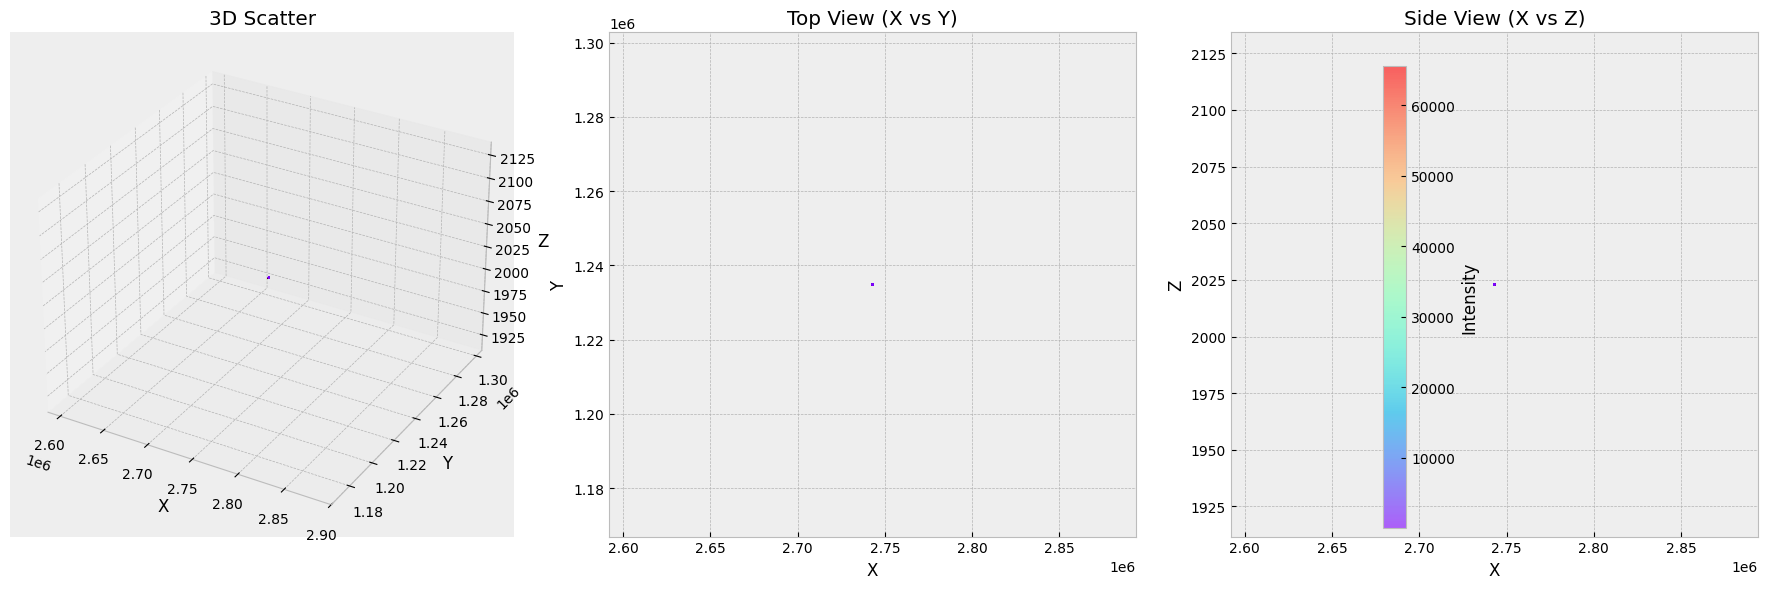

In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D  # Needed for 3D plotting

# Example function to extract the first element if the value is list-like
def extract_first(val):
    """Return the first element of val if it's list-like; otherwise, return val."""
    if isinstance(val, list) and len(val) > 0:
        return val[0]
    elif hasattr(val, '__getitem__') and not isinstance(val, str):
        try:
            return float(val[0])
        except Exception:
            return val
    else:
        return val

# --- Ensure columns are numeric if they are stored as objects or lists ---
df['X'] = df['X'].apply(extract_first).astype(float)
df['Y'] = df['Y'].apply(extract_first).astype(float)
df['Z'] = df['Z'].apply(extract_first).astype(float)
df['intensity'] = df['intensity'].astype(float)

# --- Because 20+ million points is huge, let's take a random sample ---
sample_size = 100_000
if len(df) > sample_size:
    df_sample = df.sample(sample_size, random_state=42)
else:
    df_sample = df

# --- Set up a figure with three subplots ---
fig = plt.figure(figsize=(18, 6))
plt.style.use('bmh')

# 1) 3D Scatter (X vs. Y vs. Z)
ax1 = fig.add_subplot(131, projection='3d')
sc1 = ax1.scatter(
    df_sample['X'], 
    df_sample['Y'], 
    df_sample['Z'],
    c=df_sample['intensity'],
    s=1,          # point size
    cmap='rainbow',
    alpha=0.6
)
ax1.set_xlabel('X')
ax1.set_ylabel('Y')
ax1.set_zlabel('Z')
ax1.set_title('3D Scatter')

# 2) Top View (X vs. Y)
ax2 = fig.add_subplot(132)
sc2 = ax2.scatter(
    df_sample['X'],
    df_sample['Y'],
    c=df_sample['intensity'],
    s=1,
    cmap='rainbow',
    alpha=0.6
)
ax2.set_xlabel('X')
ax2.set_ylabel('Y')
ax2.set_title('Top View (X vs Y)')

# 3) Side View (X vs. Z)
ax3 = fig.add_subplot(133)
sc3 = ax3.scatter(
    df_sample['X'],
    df_sample['Z'],
    c=df_sample['intensity'],
    s=1,
    cmap='rainbow',
    alpha=0.6
)
ax3.set_xlabel('X')
ax3.set_ylabel('Z')
ax3.set_title('Side View (X vs Z)')

# Add a colorbar (use one of the scatter objects)
cbar = plt.colorbar(sc3, ax=[ax1, ax2, ax3], label='Intensity')

plt.tight_layout()
plt.show()


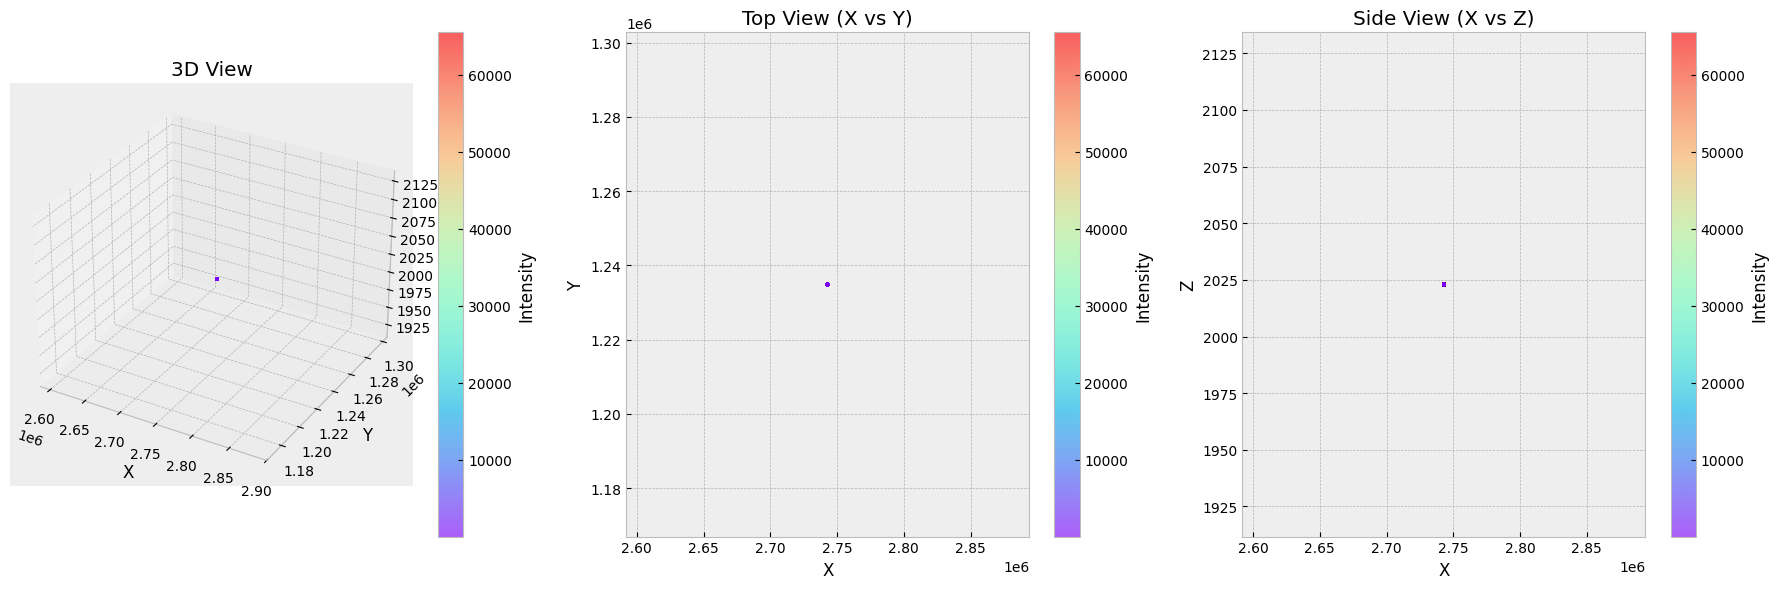

In [9]:
df = df.dropna(subset=['classification'])

df.head()

,X,Y,Z,intensity,return_number,number_of_returns,scan_direction_flag,edge_of_flight_line,classification,synthetic,key_point,withheld,scan_angle_rank,user_data,point_source_id,gps_time
0,"[2743000.0, 2743000.0, 2743000.0, 2743000.0, 2...","[1234840.87, 1234836.69, 1234836.45, 1234833.5...","[2022.98, 2027.5800000000002, 2027.65, 2030.06...",456,"[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...","[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",-17,56,1446,1.923503e+08
1,"[2743000.0, 2743000.0, 2743000.0, 2743000.0, 2...","[1234840.87, 1234836.69, 1234836.45, 1234833.5...","[2022.98, 2027.5800000000002, 2027.65, 2030.06...",387,"[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...","[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",-18,62,1446,1.923503e+08
2,"[2743000.0, 2743000.0, 2743000.0, 2743000.0, 2...","[1234840.87, 1234836.69, 1234836.45, 1234833.5...","[2022.98, 2027.5800000000002, 2027.65, 2030.06...",448,"[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...","[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",-17,60,1446,1.923503e+08
3,"[2743000.0, 2743000.0, 2743000.0, 2743000.0, 2...","[1234840.87, 1234836.69, 1234836.45, 1234833.5...","[2022.98, 2027.5800000000002, 2027.65, 2030.06...",415,"[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...","[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",-17,54,1446,1.923503e+08
4,"[2743000.0, 2743000.0, 2743000.0, 2743000.0, 2...","[1234840.87, 1234836.69, 1234836.45, 1234833.5...","[2022.98, 2027.5800000000002, 2027.65, 2030.06...",268,"[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...","[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",-18,76,1446,1.923503e+08


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D  # Needed for 3D plotting

# Convert columns to numeric floats to avoid 'ScaledArrayView' issues
df['X'] = pd.to_numeric(df['X'], errors='coerce')
df['Y'] = pd.to_numeric(df['Y'], errors='coerce')
df['Z'] = pd.to_numeric(df['Z'], errors='coerce')
df['intensity'] = pd.to_numeric(df['intensity'], errors='coerce')

# Because the dataset can be very large, sample it to avoid memory/performance problems
sample_size = 100_000
if len(df) > sample_size:
    df_sample = df.sample(sample_size, random_state=42)
else:
    df_sample = df

# Set the style sheet to bmh
plt.style.use('bmh')

# Create a figure with 3 subplots
fig = plt.figure(figsize=(18, 6))

# --- 3D View ---
ax1 = fig.add_subplot(131, projection='3d')
scatter1 = ax1.scatter(
    df_sample['X'],
    df_sample['Y'],
    df_sample['Z'],
    c=df_sample['intensity'],
    cmap='rainbow',
    alpha=0.6,
    s=5
)
ax1.set_title('3D View')
ax1.set_xlabel('X')
ax1.set_ylabel('Y')
ax1.set_zlabel('Z')
fig.colorbar(scatter1, ax=ax1, label='Intensity')

# --- Top View (X-Y) ---
ax2 = fig.add_subplot(132)
scatter2 = ax2.scatter(
    df_sample['X'],
    df_sample['Y'],
    c=df_sample['intensity'],
    cmap='rainbow',
    alpha=0.6,
    s=5
)
ax2.set_title('Top View (X vs Y)')
ax2.set_xlabel('X')
ax2.set_ylabel('Y')
fig.colorbar(scatter2, ax=ax2, label='Intensity')

# --- Side View (X-Z) ---
ax3 = fig.add_subplot(133)
scatter3 = ax3.scatter(
    df_sample['X'],
    df_sample['Z'],
    c=df_sample['intensity'],
    cmap='rainbow',
    alpha=0.6,
    s=5
)
ax3.set_title('Side View (X vs Z)')
ax3.set_xlabel('X')
ax3.set_ylabel('Z')
fig.colorbar(scatter3, ax=ax3, label='Intensity')

plt.tight_layout()
plt.show()


In [ ]:
from sklearn.preprocessing import RobustScaler

if 'las' not in globals():
	las = laspy.read("../data/2743_1234.las")

scaler = RobustScaler()
points = las.points  # Ensure 'points' is defined based on the LAS file data
points_norm = scaler.fit_transform(points)

In [ ]:
# New cell at index 39
if 'df_exploded' not in globals():
    df_exploded = df.copy()  # Fallback: use df if df_exploded is not defined

def extract_first(val):
    """If value is a list, return its first element; else return the value."""
    return val[0] if isinstance(val, list) and len(val) > 0 else val

# For saving, we use df_exploded (which has numeric Z) and extract a single number for X and Y.
def to_float_first(v):
    if type(v).__name__ == 'ScaledArrayView':
        return float(np.array(v)[0])
    if hasattr(v, '__getitem__') and not isinstance(v, str):
        try:
            return float(v[0])z
        except Exception:
            return float(v)
    else:
        return float(v)

df_exploded['X'] = df_exploded['X'].apply(to_float_first)
df_exploded['Y'] = df_exploded['Y'].apply(extract_first)
df_exploded['Z'] = df_exploded['Z'].apply(extract_first).astype(np.float64)
df_exploded['classification']
df_exploded['classification'] = df_exploded['classification'].apply(extract_first).astype(np.float64)
df_exploded['classification'].apply(extract_first).astype(np.float64)

# Clean the data using the previously defined function
df = df(df_exploded)

# Create a new LAS file with the same header options as the original
new_las = laspy.create(point_format=las.point_format, file_version=las.header.version)
new_las.header = las.header  # copy header if needed

# Ensure classification column is properly converted to numeric
df_exploded['classification'] = df_exploded['classification'].apply(extract_first).astype(np.float64)

new_las.x = df['X'].to_numpy()
new_las.y = df['Y'].to_numpy()
new_las.z = df['Z'].to_numpy()

new_las.intensity = df['intensity'].to_numpy()
new_las.classification = df['classification'].to_numpy().astype(np.uint8)
new_las.scan_angle_rank = df['scan_angle_rank'].to_numpy()
new_las.user_data = df['user_data'].to_numpy()
new_las.point_source_id = df['point_source_id'].to_numpy()
new_las.gps_time = df['gps_time'].to_numpy()

# Save the new LAS file with clean data
new_las.write("2743_1234_clean.las")
print("Clean LAS file saved as '2743_1234_clean.las'")


KeyboardInterrupt: 

In [7]:
geemap.view_lidar(filename, backend='open3d', cmap='terrain', background='white')

Jupyter environment detected. Enabling Open3D WebVisualizer.
[Open3D INFO] WebRTC GUI backend enabled.
[Open3D INFO] WebRTCWindowSystem: HTTP handshake server disabled.


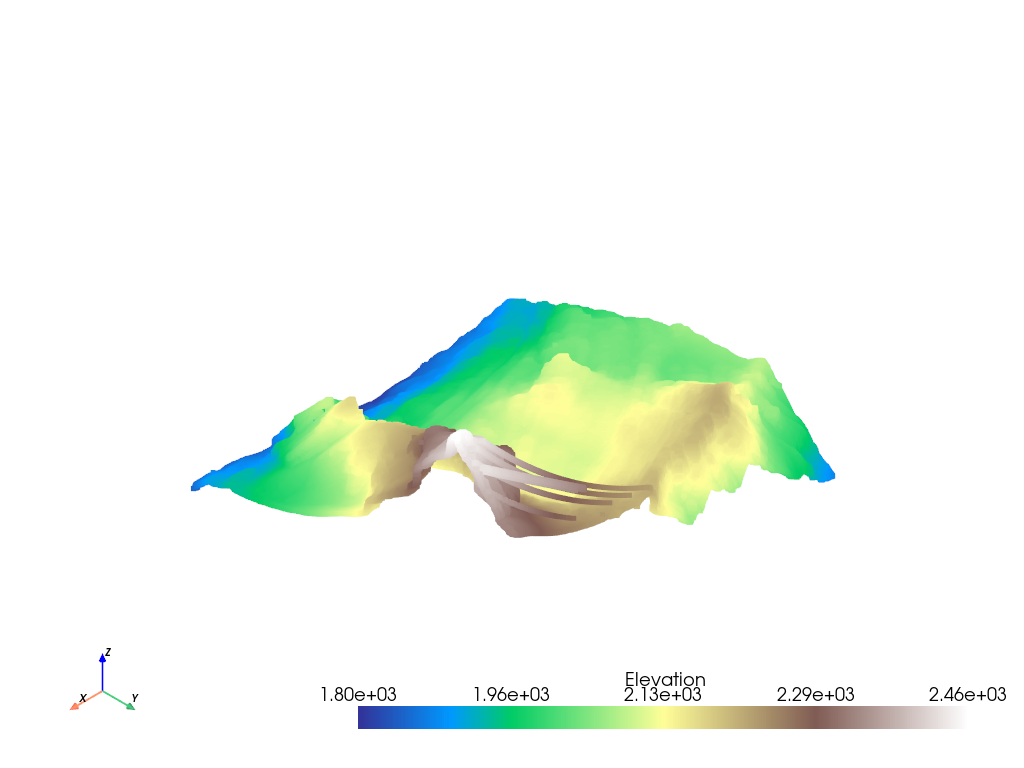

In [38]:
# Display point cloud with ipygany backend
# geemap.view_lidar(filename, backend='ipygany', background='white')

# If you want to use octree, you need to use a backend that supports it, like 'pyvista'
# Uncomment the line below if you want to use octree visualization
geemap.view_lidar(filename, backend='pyvista', background='white')

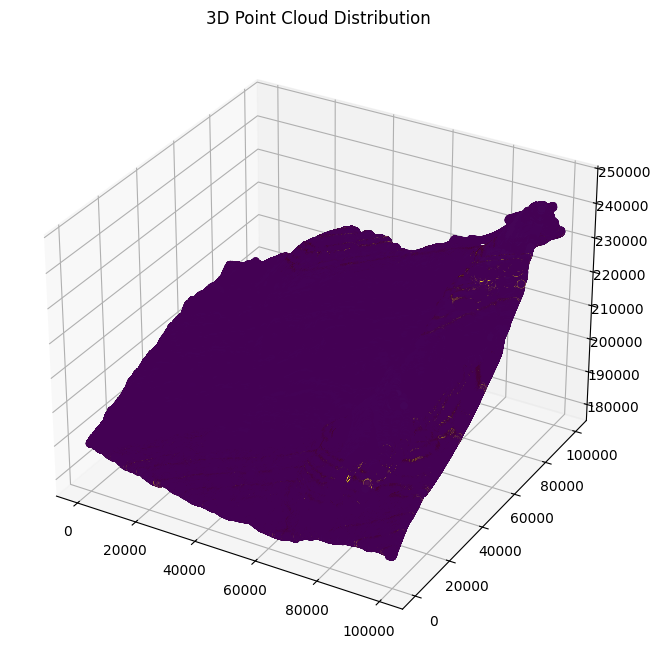

In [ ]:
# 3D Distribution Plot
fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(df['X'], df['Y'], df['Z'], c=df['Intensity'], cmap='viridis')
ax.set_title('3D Point Cloud Distribution')
plt.show()

In [22]:


# Update the 'classification' column:
# if the value is a list with identical elements, use the first element;
# otherwise, keep as is (or set to NaN)
df['classification'] = df['classification'].apply(
    lambda x: x[0] if isinstance(x, list) and len(x) > 0 and all(val == x[0] for val in x)
    else (x if not isinstance(x, list) else np.nan)
)

# Convert 'classification' to numeric type if possible
df['classification'] = pd.to_numeric(df['classification'], errors='coerce')

# Select numeric columns based on the table structure
numeric_cols = ['intensity', 'classification', 'scan_angle_rank', 'user_data', 'point_source_id', 'gps_time']

# Check if there is data to analyze
if df[numeric_cols].dropna().empty:
    print("No data available for correlation analysis.")
else:
    corr_matrix = df[numeric_cols].corr()
    sns.heatmap(corr_matrix, annot=True)
    plt.title('Feature Correlation Matrix')
    plt.show()

No data available for correlation analysis.


In [ ]:
df = df.dropna(subset=['classification'])

df.head()

No classification data available to plot.


Text(0.5, 1.0, 'Elevation Distribution')

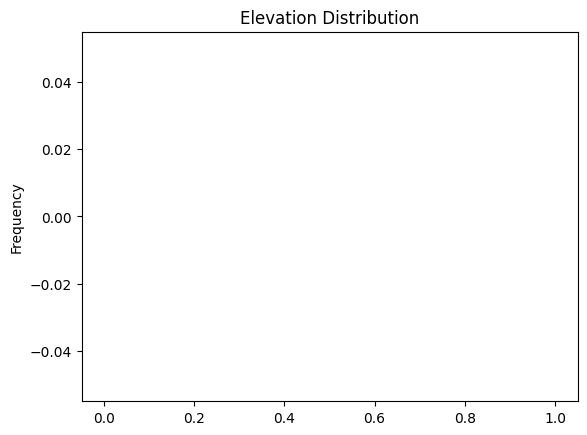

In [ ]:
from sklearn.preprocessing import RobustScaler

if 'las' not in globals():
	las = laspy.read("../data/2743_1234.las")

scaler = RobustScaler()
points = las.points  # Ensure 'points' is defined based on the LAS file data
points_norm = scaler.fit_transform(points)

In [ ]:
# New cell at index 39
if 'df_exploded' not in globals():
    df_exploded = df.copy()  # Fallback: use df if df_exploded is not defined

def extract_first(val):
    """If value is a list, return its first element; else return the value."""
    return val[0] if isinstance(val, list) and len(val) > 0 else val

# For saving, we use df_exploded (which has numeric Z) and extract a single number for X and Y.
def to_float_first(v):
    if type(v).__name__ == 'ScaledArrayView':
        return float(np.array(v)[0])
    if hasattr(v, '__getitem__') and not isinstance(v, str):
        try:
            return float(v[0])
        except Exception:
            return float(v)
    else:
        return float(v)

df_exploded['X'] = df_exploded['X'].apply(to_float_first)
df_exploded['Y'] = df_exploded['Y'].apply(extract_first)
df_exploded['Z'] = df_exploded['Z'].apply(extract_first).astype(np.float64)
df_exploded['classification']
df_exploded['classification'] = df_exploded['classification'].apply(extract_first).astype(np.float64)
df_exploded['classification'].apply(extract_first).astype(np.float64)

# Clean the data using the previously defined function
df = df(df_exploded)

# Create a new LAS file with the same header options as the original
new_las = laspy.create(point_format=las.point_format, file_version=las.header.version)
new_las.header = las.header  # copy header if needed

# Ensure classification column is properly converted to numeric
df_exploded['classification'] = df_exploded['classification'].apply(extract_first).astype(np.float64)

new_las.x = df['X'].to_numpy()
new_las.y = df['Y'].to_numpy()
new_las.z = df['Z'].to_numpy()

new_las.intensity = df['intensity'].to_numpy()
new_las.classification = df['classification'].to_numpy().astype(np.uint8)
new_las.scan_angle_rank = df['scan_angle_rank'].to_numpy()
new_las.user_data = df['user_data'].to_numpy()
new_las.point_source_id = df['point_source_id'].to_numpy()
new_las.gps_time = df['gps_time'].to_numpy()

# Save the new LAS file with clean data
new_las.write("2743_1234_clean.las")
print("Clean LAS file saved as '2743_1234_clean.las'")


Jupyter environment detected. Enabling Open3D WebVisualizer.
[Open3D INFO] WebRTC GUI backend enabled.
[Open3D INFO] WebRTCWindowSystem: HTTP handshake server disabled.


In [ ]:
print("Processing LAS file...")